# Importation des bibliothèques

In [4]:
%pip install matplotlib
%pip install seaborn
%pip install plot_likert


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plot_likert

# Chargement et Nettoyage du questionnaire

**Nota** : Avant leur import, les résultats du questionnaire ont été nettoyées des quelques données personnelles insérées dans les commentaires.

In [6]:
df = pd.read_csv("V1.1_recrutement_et_IA_sauf noms.csv", header=[1], sep=";")

## Contrôle visuel du questionnaire

In [7]:
df.head(10)

,Colonnes,SID,Heure de soumission,Heure de complétion,Heure de modification,Brouillon,Adresse IP,UID,Nom d'utilisateur,Rédiger des CV ou des lettres de motivation,...,Lors de la négociation sur votre rémunération et autres avantages,Lors de la rédaction de votre contrat de travail,Le respect de votre vie privée,L'empreinte carbone de l'IA utilisée,L'absence de toute discrimination,L'équité entre tous les candidats,Le respect de la diversité,Aimeriez-vous savoir si votre recruteur a prévu d'utiliser l'IA dans le processus de recrutement ?,Quelle est votre tranche d'âge?,Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA :
0,3,25290150,11/01/2025 - 20:28,11/01/2025 - 20:28,11/01/2025 - 20:28,0,0.0.0.0,0,Anonymous,Plutôt opposé,...,"Ni réticent, ni favorable",Favorable,C'est plutôt important,C'est important ou secondaire,C'est très important,C'est très important,C'est important ou secondaire,C'est important,25-34 ans,NaN
1,4,25290276,11/01/2025 - 20:51,11/01/2025 - 20:51,11/01/2025 - 20:51,0,0.0.0.0,0,Anonymous,Totalement opposé,...,Très réticent,Réticent,C'est plutôt important,NaN,C'est très important,C'est très important,C'est très important,C'est essentiel,45-54 ans,NaN
2,5,25290441,11/01/2025 - 21:18,11/01/2025 - 21:18,11/01/2025 - 21:18,0,0.0.0.0,0,Anonymous,Assez favorable,...,Réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est important,45-54 ans,NaN
3,6,25291335,12/01/2025 - 03:53,12/01/2025 - 03:53,12/01/2025 - 03:53,0,0.0.0.0,0,Anonymous,Tout à fait favorable,...,Très réticent,"Ni réticent, ni favorable",C'est plutôt important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est essentiel,55-64 ans,NaN
4,7,25291387,12/01/2025 - 06:52,12/01/2025 - 06:52,12/01/2025 - 06:52,0,0.0.0.0,0,Anonymous,"Ni favorable, ni opposé",...,Réticent,"Ni réticent, ni favorable",C'est très secondaire,NaN,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans,Je connais très peu l'IA et dois me faire expl...
5,8,25291456,12/01/2025 - 07:52,12/01/2025 - 07:52,12/01/2025 - 07:52,0,0.0.0.0,0,Anonymous,Assez favorable,...,Réticent,"Ni réticent, ni favorable",C'est très important,C'est très important,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est essentiel,55-64 ans,NaN
6,9,25291533,12/01/2025 - 08:27,12/01/2025 - 08:27,12/01/2025 - 08:27,0,0.0.0.0,0,Anonymous,Assez favorable,...,Très réticent,Très réticent,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est très important,C'est plutôt important,C'est important,25-34 ans,NaN
7,10,25291545,12/01/2025 - 08:30,12/01/2025 - 08:30,12/01/2025 - 08:30,0,0.0.0.0,0,Anonymous,Tout à fait favorable,...,Très réticent,Très réticent,C'est très important,C'est très secondaire,C'est très important,C'est très important,C'est très secondaire,C'est essentiel,55-64 ans,Elle ne vaut pas un clou
8,11,25291576,12/01/2025 - 08:37,12/01/2025 - 08:37,12/01/2025 - 08:37,0,0.0.0.0,0,Anonymous,Totalement opposé,...,Très réticent,Très réticent,C'est très important,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans,Cela caractérise le niveau de servilité du rec...
9,12,25291608,12/01/2025 - 08:47,12/01/2025 - 08:47,12/01/2025 - 08:47,0,0.0.0.0,0,Anonymous,Assez favorable,...,Très réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est important,55-64 ans,NaN


## Suppression des colonnes à caractère technique sans données liées aux questions

In [8]:
df = df.drop(df.columns[0:9], axis=1)

In [9]:
df.head(2)

,Rédiger des CV ou des lettres de motivation,Améliorer votre profil LinkedIn,Préparer des entretiens d'embauche,Vous renseigner sur votre futur employeur,Répondre plus rapidement à une offre,ChatGPT et autres IA génératives (génération de texte ou d'images),"Moteur de recherche (Chrome, Safari, Firefox)",Application de navigation disponibles sur votre mobile ou dans votre voiture,Autres usages professionnels ou scientifiques,Pour sélectionner les meilleur•e•s candidat•e•s,...,Lors de la négociation sur votre rémunération et autres avantages,Lors de la rédaction de votre contrat de travail,Le respect de votre vie privée,L'empreinte carbone de l'IA utilisée,L'absence de toute discrimination,L'équité entre tous les candidats,Le respect de la diversité,Aimeriez-vous savoir si votre recruteur a prévu d'utiliser l'IA dans le processus de recrutement ?,Quelle est votre tranche d'âge?,Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA :
0,Plutôt opposé,Assez favorable,Totalement opposé,Plutôt opposé,Assez favorable,à l'aise,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Très faible,...,"Ni réticent, ni favorable",Favorable,C'est plutôt important,C'est important ou secondaire,C'est très important,C'est très important,C'est important ou secondaire,C'est important,25-34 ans,NaN
1,Totalement opposé,Plutôt opposé,Plutôt opposé,"Ni favorable, ni opposé","Ni favorable, ni opposé",Plutôt à l'aise,à l'aise,Plutôt à l'aise,Plutôt à l'aise,"Ni faible, ni élevé",...,Très réticent,Réticent,C'est plutôt important,NaN,C'est très important,C'est très important,C'est très important,C'est essentiel,45-54 ans,NaN


In [10]:
# Création d'un Dataframe utile pour le calcul du mode

df_mode = df.drop("Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA : ", axis=1)

In [11]:
df.describe()

,Rédiger des CV ou des lettres de motivation,Améliorer votre profil LinkedIn,Préparer des entretiens d'embauche,Vous renseigner sur votre futur employeur,Répondre plus rapidement à une offre,ChatGPT et autres IA génératives (génération de texte ou d'images),"Moteur de recherche (Chrome, Safari, Firefox)",Application de navigation disponibles sur votre mobile ou dans votre voiture,Autres usages professionnels ou scientifiques,Pour sélectionner les meilleur•e•s candidat•e•s,...,Lors de la négociation sur votre rémunération et autres avantages,Lors de la rédaction de votre contrat de travail,Le respect de votre vie privée,L'empreinte carbone de l'IA utilisée,L'absence de toute discrimination,L'équité entre tous les candidats,Le respect de la diversité,Aimeriez-vous savoir si votre recruteur a prévu d'utiliser l'IA dans le processus de recrutement ?,Quelle est votre tranche d'âge?,Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA :
count,161,161,161,161,161,161,161,161,161,161,...,161,161,161,159,161,161,159,161,161,67
unique,5,5,5,5,5,5,5,5,5,4,...,5,5,4,5,5,4,5,5,5,67
top,Tout à fait favorable,Assez favorable,Tout à fait favorable,Tout à fait favorable,Assez favorable,Plutôt à l'aise,à l'aise,à l'aise,Plutôt à l'aise,Faible,...,Très réticent,Très réticent,C'est très important,C'est plutôt important,C'est très important,C'est très important,C'est très important,C'est important,55-64 ans,Je connais très peu l'IA et dois me faire expl...
freq,52,54,52,45,47,56,90,75,61,57,...,74,44,124,40,68,88,51,63,60,1


## Simplification du nommage des colonnes du questionnaire

**Le questionnaire est organisé en 6 rubriques comportant chacune des sous-questions:**
- Rubrique 1 : utilité perçue de l'usage de l'IA dans un recrutement;
- Rubrique 2 : facilité d'usage de l'IA en général;
- Rubrique 3 : confiance dans l'usage dans le recruteur utilisant une IA;
- Rubrique 4 : acceptation de l'usage de l'IA par le recruteur;
- Rubrique 5 : importance accordée à l'éthique dans l'usage de l'IA;
- Rubrique 6 : divers, comme l'importance accordée à l'information sur l'usage de l'IA, la catégorie d'âge et un champ de texte libre.

### Mapping des colonnes par catégorie

In [12]:
import collections

In [13]:
dict_usefulness_columns = collections.OrderedDict({"Rédiger des CV ou des lettres de motivation": "useful_resume_CV",
                  "Améliorer votre profil LinkedIn": "useful_linkedin",
                  "Préparer des entretiens d'embauche": "useful_interview",
                  "Vous renseigner sur votre futur employeur": "useful_intelligence",
                  "Répondre plus rapidement à une offre": "useful_speedy_response"
                  })

In [14]:
dict_easiness_columns = collections.OrderedDict({"ChatGPT et autres IA génératives (génération de texte ou d'images)": "easiness_generative_AI",
                  "Moteur de recherche (Chrome, Safari, Firefox)": "easiness_search_engine",
                  "Application de navigation disponibles sur votre mobile ou dans votre voiture": "easiness_navigation",
                  "Autres usages professionnels ou scientifiques": "easiness_business_sciences"
                  })

In [15]:
dict_trust_columns = collections.OrderedDict({"Pour sélectionner les meilleur•e•s candidat•e•s": "trust_best_applicants",
                   "Pour réduire le risque de discrimination" : "trust_discrimination",
                    "Pour un recrutement plus éthique": "trust_ethics",
                    "Pour diversifier les recrutements": "trust_diversity"
                  })

In [16]:
dict_acceptance_columns = collections.OrderedDict({"Lors du tri initial des candidatures": "acceptance_sorting_resumes",
                        "Lors des tests de sélection": "acceptance_selection_tests",
                        "Lors des entretiens individuels": "acceptance_interviews",
                        "Lors de la discussion sur le périmètre de votre poste": "acceptance_negotiation",
                        "Lors de la négociation sur votre rémunération et autres avantages": "acceptance_wages_package",
                        "Lors de la rédaction de votre contrat de travail": "acceptance_contract"
                       })

In [17]:
dict_ethics_columns = collections.OrderedDict({"Le respect de votre vie privée": "ethics_privacy",
                        "L\'empreinte carbone de l\'IA utilisée": "ethics_carbon_footprint",
                        "L\'absence de toute discrimination": "ethics_no_discrimination",
                        "L\'équité entre tous les candidats": "ethics_fairness_for_applicants",
                        "Le respect de la diversité": "ethics_diversity"
                        })

In [18]:
dict_misc_columns = collections.OrderedDict(
    {"Aimeriez-vous savoir si votre recruteur a prévu d\'utiliser l\'IA dans le processus de recrutement ?": "misc_recruiter_uses_AI",
    "Quelle est votre tranche d\'âge?": "misc_age_category",
    "Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA : ": "misc_free_text"
    })

### Renommage des colonnes

In [19]:
# rename columns dealing with usefulness
df = df.rename(columns=dict_usefulness_columns)

In [20]:
# rename columns dealing with easiness of use
df = df.rename(columns=dict_easiness_columns)

In [21]:
# rename columns dealing with trust
df = df.rename(columns=dict_trust_columns)

In [22]:
# rename columns dealing with acceptance
df = df.rename(columns=dict_acceptance_columns)

In [23]:
# Rename columns dealing with ethics
df = df.rename(columns=dict_ethics_columns)

In [24]:
# Rename miscellaneous questions
df = df.rename(columns=dict_misc_columns)

In [25]:
df.head(10)

,useful_resume_CV,useful_linkedin,useful_interview,useful_intelligence,useful_speedy_response,easiness_generative_AI,easiness_search_engine,easiness_navigation,easiness_business_sciences,trust_best_applicants,...,acceptance_wages_package,acceptance_contract,ethics_privacy,ethics_carbon_footprint,ethics_no_discrimination,ethics_fairness_for_applicants,ethics_diversity,misc_recruiter_uses_AI,misc_age_category,misc_free_text
0,Plutôt opposé,Assez favorable,Totalement opposé,Plutôt opposé,Assez favorable,à l'aise,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Très faible,...,"Ni réticent, ni favorable",Favorable,C'est plutôt important,C'est important ou secondaire,C'est très important,C'est très important,C'est important ou secondaire,C'est important,25-34 ans,NaN
1,Totalement opposé,Plutôt opposé,Plutôt opposé,"Ni favorable, ni opposé","Ni favorable, ni opposé",Plutôt à l'aise,à l'aise,Plutôt à l'aise,Plutôt à l'aise,"Ni faible, ni élevé",...,Très réticent,Réticent,C'est plutôt important,NaN,C'est très important,C'est très important,C'est très important,C'est essentiel,45-54 ans,NaN
2,Assez favorable,Tout à fait favorable,Tout à fait favorable,Plutôt opposé,Tout à fait favorable,Plutôt à l'aise,Plutôt à l'aise,"Ni aisance, ni difficultés","Ni aisance, ni difficultés",Très faible,...,Réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est important,45-54 ans,NaN
3,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Plutôt à l'aise,à l'aise,à l'aise,à l'aise,Faible,...,Très réticent,"Ni réticent, ni favorable",C'est plutôt important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est essentiel,55-64 ans,NaN
4,"Ni favorable, ni opposé",Plutôt opposé,Assez favorable,"Ni favorable, ni opposé","Ni favorable, ni opposé",Quelques difficultés,En difficulté,En difficulté,Quelques difficultés,"Ni faible, ni élevé",...,Réticent,"Ni réticent, ni favorable",C'est très secondaire,NaN,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans,Je connais très peu l'IA et dois me faire expl...
5,Assez favorable,Assez favorable,Assez favorable,Tout à fait favorable,Assez favorable,"Ni aisance, ni difficultés",à l'aise,à l'aise,à l'aise,Faible,...,Réticent,"Ni réticent, ni favorable",C'est très important,C'est très important,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est essentiel,55-64 ans,NaN
6,Assez favorable,Assez favorable,"Ni favorable, ni opposé",Assez favorable,Assez favorable,Plutôt à l'aise,à l'aise,à l'aise,Plutôt à l'aise,"Ni faible, ni élevé",...,Très réticent,Très réticent,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est très important,C'est plutôt important,C'est important,25-34 ans,NaN
7,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,à l'aise,à l'aise,à l'aise,à l'aise,Faible,...,Très réticent,Très réticent,C'est très important,C'est très secondaire,C'est très important,C'est très important,C'est très secondaire,C'est essentiel,55-64 ans,Elle ne vaut pas un clou
8,Totalement opposé,Totalement opposé,Totalement opposé,Assez favorable,Totalement opposé,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Très faible,...,Très réticent,Très réticent,C'est très important,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans,Cela caractérise le niveau de servilité du rec...
9,Assez favorable,Tout à fait favorable,"Ni favorable, ni opposé",Tout à fait favorable,Assez favorable,"Ni aisance, ni difficultés",Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Faible,...,Très réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est important,55-64 ans,NaN


### Création de Dataframes spécialisés

In [26]:
# Création d'un Dataframe avec les colonnes liées à l'utilité perçue
df_usefulness = df[list(dict_usefulness_columns.values())]
df_usefulness

,useful_resume_CV,useful_linkedin,useful_interview,useful_intelligence,useful_speedy_response
0,Plutôt opposé,Assez favorable,Totalement opposé,Plutôt opposé,Assez favorable
1,Totalement opposé,Plutôt opposé,Plutôt opposé,"Ni favorable, ni opposé","Ni favorable, ni opposé"
2,Assez favorable,Tout à fait favorable,Tout à fait favorable,Plutôt opposé,Tout à fait favorable
3,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable
4,"Ni favorable, ni opposé",Plutôt opposé,Assez favorable,"Ni favorable, ni opposé","Ni favorable, ni opposé"
...,...,...,...,...,...
156,Assez favorable,"Ni favorable, ni opposé",Tout à fait favorable,Plutôt opposé,Assez favorable
157,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable
158,Assez favorable,Assez favorable,Tout à fait favorable,Tout à fait favorable,Assez favorable
159,Tout à fait favorable,Assez favorable,Assez favorable,"Ni favorable, ni opposé",Tout à fait favorable


In [27]:
# Création d'un Dataframe avec les colonnes liées à la facilité d'usage
df_easiness = df[list(dict_easiness_columns.values())]
df_easiness

,easiness_generative_AI,easiness_search_engine,easiness_navigation,easiness_business_sciences
0,à l'aise,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise
1,Plutôt à l'aise,à l'aise,Plutôt à l'aise,Plutôt à l'aise
2,Plutôt à l'aise,Plutôt à l'aise,"Ni aisance, ni difficultés","Ni aisance, ni difficultés"
3,Plutôt à l'aise,à l'aise,à l'aise,à l'aise
4,Quelques difficultés,En difficulté,En difficulté,Quelques difficultés
...,...,...,...,...
156,à l'aise,à l'aise,à l'aise,à l'aise
157,à l'aise,Plutôt à l'aise,Plutôt à l'aise,à l'aise
158,à l'aise,à l'aise,à l'aise,à l'aise
159,à l'aise,à l'aise,à l'aise,Plutôt à l'aise


In [28]:
# Création d'un Dataframe avec les colonnes liées à la confiance
df_trust = df[list(dict_trust_columns.values())]

In [29]:
# Création d'un Dataframe avec les colonnes liées à l'acceptation
df_acceptance = df[list(dict_acceptance_columns.values())]

In [30]:
# Création d'un Dataframe avec les colonnes liées à l'éthique
df_ethics = df[list(dict_ethics_columns.values())]

#### Création d'un Dataframe sur l'âge et l'acceptation

In [31]:
df_age_acceptance = df[["misc_age_category", "acceptance_sorting_resumes", "acceptance_selection_tests", "acceptance_interviews", "acceptance_negotiation", "acceptance_wages_package", "acceptance_contract"]]

In [32]:
df_age_acceptance.head()

,misc_age_category,acceptance_sorting_resumes,acceptance_selection_tests,acceptance_interviews,acceptance_negotiation,acceptance_wages_package,acceptance_contract
0,25-34 ans,"Ni réticent, ni favorable",Réticent,Très réticent,Favorable,"Ni réticent, ni favorable",Favorable
1,45-54 ans,"Ni réticent, ni favorable",Réticent,Très réticent,Réticent,Très réticent,Réticent
2,45-54 ans,Réticent,Réticent,Réticent,Réticent,Réticent,Favorable
3,55-64 ans,Réticent,"Ni réticent, ni favorable",Réticent,Très réticent,Très réticent,"Ni réticent, ni favorable"
4,55-64 ans,Réticent,Réticent,Très réticent,Très réticent,Réticent,"Ni réticent, ni favorable"


#### Création d'un dataframe avec les réponses en texte libre

In [33]:
df_verbatim = df["misc_free_text"]
df_verbatim.head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Je connais très peu l'IA et dois me faire expl...
Name: misc_free_text, dtype: object

In [34]:
# Retrait de la colonne Verbatim du Dataframe
df = df.drop("misc_free_text", axis=1)

### Nombre de réponses par âge

In [35]:
age_counts = df['misc_age_category'].value_counts().sort_index()
age_counts

misc_age_category
18-24 ans    30
25-34 ans    24
35-44 ans    21
45-54 ans    26
55-64 ans    60
Name: count, dtype: int64

In [36]:
((30 + 24 +21)/161)*100

46.58385093167702

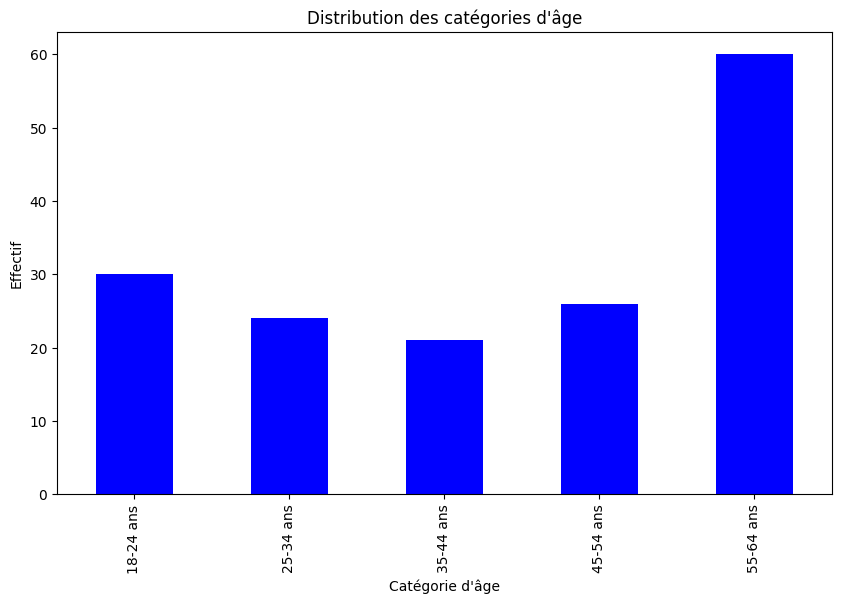

In [37]:
# Dessiner un graphique en barres
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='blue')
plt.xlabel("Catégorie d'âge")
plt.ylabel("Effectif")
plt.title("Distribution des catégories d'âge")
plt.show()

## Remplacement dans les réponses des valeurs alphanumériques par des valeurs numériques

### Définition des valeurs numériques de remplacement

**L'échelle de Likert à 5 valeurs est utilisée. La valeur neutre est toujours la 3ème** <br>
**La valeur ayant la connotattion la plus négative et/ou secondaire est égale à 1, la valeur la plus positive et/ou importante est égale à 5**


In [38]:
likert_mapping_usefulness = {"Totalement opposé":1,
                    "Plutôt opposé":2,
                    "Ni favorable, ni opposé":3,
                    "Assez favorable":4,
                    "Tout à fait favorable":5}

likert_mapping_easiness = {"à l\'aise":5,
                    "Plutôt à l\'aise":4,
                    "Ni aisance, ni difficultés":3,
                    "Quelques difficultés":2,
                    "En difficulté":1}

likert_mapping_trust = {"Très faible":1,
                        "Faible":2,
                        "Ni faible, ni élevé":3,
                        "Elevé":4,
                        "Très élevé":5}

likert_mapping_acceptance = {"Très réticent":1,
                            "Réticent":2,
                            "Ni réticent, ni favorable":3,
                            "Favorable":4,
                            "Très favorable":5}

likert_mapping_ethics = {"C\'est très important":5,
                        "C\'est plutôt important":4,
                        "C\'est important ou secondaire":3,
                        "C\'est plutôt secondaire":2,
                        "C\'est très secondaire":1}

likert_mapping_AI_hiring = {"C\'est essentiel":5,
                            "C\'est important":4,
                            "Cela dépend":3,
                            "C\'est secondaire":2,
                            "C\'est sans intérêt":1}

likert_mapping_age_category = {"18-24 ans": 1,
                                "25-34 ans": 2,
                                "35-44 ans": 3,
                                "45-54 ans": 4,
                                "55-64 ans": 5,
                                "65 ans et plus": 6}

### Conversion des résultats alphanumériques en valeurs numériques

In [39]:
# Replace values in usefulness columns
usefulness_columns = list(dict_usefulness_columns.values())
print(usefulness_columns)
df[usefulness_columns] = df[usefulness_columns].replace(likert_mapping_usefulness)

['useful_resume_CV', 'useful_linkedin', 'useful_interview', 'useful_intelligence', 'useful_speedy_response']


/var/folders/s7/p8pn64651j3gbhq2mkzzm52m0000gn/T/ipykernel_53698/2900610947.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[usefulness_columns] = df[usefulness_columns].replace(likert_mapping_usefulness)


In [40]:
# Replace values in easiness columns
easiness_columns = list(dict_easiness_columns.values())
print(easiness_columns)
df[easiness_columns] = df[easiness_columns].replace(likert_mapping_easiness)

['easiness_generative_AI', 'easiness_search_engine', 'easiness_navigation', 'easiness_business_sciences']


/var/folders/s7/p8pn64651j3gbhq2mkzzm52m0000gn/T/ipykernel_53698/335959985.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[easiness_columns] = df[easiness_columns].replace(likert_mapping_easiness)


In [41]:
# Replace values in trust columns
trust_columns = list(dict_trust_columns.values())
print(trust_columns)
df[trust_columns] = df[trust_columns].replace(likert_mapping_trust)

['trust_best_applicants', 'trust_discrimination', 'trust_ethics', 'trust_diversity']


/var/folders/s7/p8pn64651j3gbhq2mkzzm52m0000gn/T/ipykernel_53698/1024283511.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[trust_columns] = df[trust_columns].replace(likert_mapping_trust)


In [42]:
# Replace value in acceptance columns
acceptance_columns = list(dict_acceptance_columns.values())
print(acceptance_columns)
df[acceptance_columns] = df[acceptance_columns].replace(likert_mapping_acceptance)

['acceptance_sorting_resumes', 'acceptance_selection_tests', 'acceptance_interviews', 'acceptance_negotiation', 'acceptance_wages_package', 'acceptance_contract']


/var/folders/s7/p8pn64651j3gbhq2mkzzm52m0000gn/T/ipykernel_53698/1053155161.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[acceptance_columns] = df[acceptance_columns].replace(likert_mapping_acceptance)


In [43]:
# Replace values in ethics columns
ethics_columns = list(dict_ethics_columns.values())
print(ethics_columns)
df[ethics_columns] = df[ethics_columns].replace(likert_mapping_ethics)

['ethics_privacy', 'ethics_carbon_footprint', 'ethics_no_discrimination', 'ethics_fairness_for_applicants', 'ethics_diversity']


/var/folders/s7/p8pn64651j3gbhq2mkzzm52m0000gn/T/ipykernel_53698/3203036378.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[ethics_columns] = df[ethics_columns].replace(likert_mapping_ethics)


In [44]:
misc_columns = list(dict_misc_columns.values())
print(misc_columns)
df[misc_columns[0]] = df[misc_columns[0]].replace(likert_mapping_AI_hiring)

['misc_recruiter_uses_AI', 'misc_age_category', 'misc_free_text']


/var/folders/s7/p8pn64651j3gbhq2mkzzm52m0000gn/T/ipykernel_53698/1376742802.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[misc_columns[0]] = df[misc_columns[0]].replace(likert_mapping_AI_hiring)


In [45]:
df[misc_columns[1]] = df[misc_columns[1]].replace(likert_mapping_age_category)

/var/folders/s7/p8pn64651j3gbhq2mkzzm52m0000gn/T/ipykernel_53698/4046352649.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[misc_columns[1]] = df[misc_columns[1]].replace(likert_mapping_age_category)


In [46]:
df.head()

,useful_resume_CV,useful_linkedin,useful_interview,useful_intelligence,useful_speedy_response,easiness_generative_AI,easiness_search_engine,easiness_navigation,easiness_business_sciences,trust_best_applicants,...,acceptance_negotiation,acceptance_wages_package,acceptance_contract,ethics_privacy,ethics_carbon_footprint,ethics_no_discrimination,ethics_fairness_for_applicants,ethics_diversity,misc_recruiter_uses_AI,misc_age_category
0,2,4,1,2,4,5,4,4,4,1,...,4,3,4,4,3.0,5,5,3.0,4,2
1,1,2,2,3,3,4,5,4,4,3,...,2,1,2,4,NaN,5,5,5.0,5,4
2,4,5,5,2,5,4,4,3,3,1,...,2,2,4,5,2.0,4,4,4.0,4,4
3,5,5,5,5,5,4,5,5,5,2,...,1,1,3,4,2.0,4,5,3.0,5,5
4,3,2,4,3,3,2,1,1,2,3,...,1,2,3,1,NaN,1,1,1.0,5,5


# Chiffres essentiels

## Nombre de réponses

In [47]:
shape = df.shape

In [48]:
print(f"Le questionnaire comporte {shape[0]} réponses avec chacune {shape[1]} items")

Le questionnaire comporte 161 réponses avec chacune 26 items


## Contrôle du nombre de réponse à chaque question

In [49]:
df.count()

useful_resume_CV                  161
useful_linkedin                   161
useful_interview                  161
useful_intelligence               161
useful_speedy_response            161
easiness_generative_AI            161
easiness_search_engine            161
easiness_navigation               161
easiness_business_sciences        161
trust_best_applicants             161
trust_discrimination              161
trust_ethics                      161
trust_diversity                   161
acceptance_sorting_resumes        161
acceptance_selection_tests        161
acceptance_interviews             161
acceptance_negotiation            161
acceptance_wages_package          161
acceptance_contract               161
ethics_privacy                    161
ethics_carbon_footprint           159
ethics_no_discrimination          161
ethics_fairness_for_applicants    161
ethics_diversity                  159
misc_recruiter_uses_AI            161
misc_age_category                 161
dtype: int64

### Commentaire en première approche sur le nombre de réponses.

- 161 personnes ont répondu. La totalité des questions a obtenu 161 réponses
- 3 questions ont obtenu un moins de 161 réponses : celle portant sur l'empreinte carbone (159 réponses), sur la diversité (159 réponses) et celle du commentaire libre (67 réponses).
- Répondre sur l'éthique de l'IA comme le commentaire libre était optionnel, mais indiqué comme tel uniquement pour le commentaire libre.
- Les deux colonnes où il manque 2 valeurs par colonnes sont celles dédiées à la diversité et à l'empreinte carbone. Elles ne jouent pas de rôle dans le contrôle des H0.

### Pourcentage de réponses pour les questions optionnelles

In [50]:
# Pourcentage de réponses pour les questions optionnelles
counts = dict(df.count())
ethics_diversity = int(counts.get("ethics_diversity"))
ethics_carbon_footprint = int(counts.get("ethics_carbon_footprint"))
free_text = df_verbatim.count()

percent_diversity = round(ethics_diversity/shape[0]*100, 1)
percent_carbon_footprint = round(ethics_carbon_footprint/shape[0]*100, 1)
free_text= round(free_text/shape[0]*100, 1)

In [51]:
print(f"{percent_diversity}% des répondants se sont positionnés sur l'importance accordée à la diversité.")
print(f"{percent_diversity}% des répondants se sont positionnés sur l'importance accordée à l'empreinte carbone.")
print(f"{free_text}% des répondants ont laissé un commentaire en texte libre à la fin du questionnaire.")

98.8% des répondants se sont positionnés sur l'importance accordée à la diversité.
98.8% des répondants se sont positionnés sur l'importance accordée à l'empreinte carbone.
41.6% des répondants ont laissé un commentaire en texte libre à la fin du questionnaire.


# Calcul de la fiabilité du questionnaire

**Nous allons calculer l'intervalle de confiance et la marge d'erreur sur la base du nombre de réponses au questionnaire**

In [52]:
import math

In [53]:
# Usually confidence level is either 0.90, 0.95 or 0.99, depending on the expected strength of the questionnaire
confidence_level = 0.95

# The estimated ratio p defines the maximum margin of error. 0.5 is a standard value in case of lack of prior reference
p = 0.5

## Calcul de la valeur de score z

In [54]:
import scipy.stats

In [55]:
def calculate_z(confidence_level):
    """
    Calculate z score depending on chosen confidence level.

    Arguments:
        confidence_level: represents the level of confidence expressing the confidence that the sample represents the overall population. 
        Usual values for z are : 0.9, 0.95 or 0.99. The higher the figure, the stronger the level of confidence.

    Returns:
        z score: used to subsequently calculate a margin of error depending on confidence level.
    """
    
    cumulative_probability = (1 + confidence_level)/2
    z = scipy.stats.norm.ppf(cumulative_probability)

    return z

In [56]:
z_score = calculate_z(confidence_level)

In [57]:
print(f"La valeur du score z pour un niveau de confiance de {confidence_level} est de {round(z_score, 2)}")

La valeur du score z pour un niveau de confiance de 0.95 est de 1.96


## Correction en fonction de la population active

In [58]:
# total french workforce
total_workforce = 30000000

# sample size
sample_size = shape[0]

In [59]:
def population_correction(total_population, sample_size):
    """ Calculate the finished population correction factor due to sample size.

        Parameters:
        total_population: total population to be considered.
        sample_size: number of responses in the questionnaire.

        Returns:
        pop_correction_factor: factor determining the optimal sample size considering the overall finished population. 
        A 1.0 factor means the sample size is not ideal with regards to the population.
    """
    pop_correction_factor = math.sqrt((total_population - sample_size) / (total_workforce - 1))
    return pop_correction_factor

In [60]:
pop_correction_factor = population_correction(total_workforce, sample_size)

In [61]:
print(f"Le facteur de correction de la population finie est de {round(pop_correction_factor, 0)}")

Le facteur de correction de la population finie est de 1.0


## Calcul de l'intervalle de confiance

In [62]:
def confidence_interval(confidence_level, total_population, sample_size, z_score, pop_correction_factor,  p=0.5):
    """
    Calculate the confidence interval and the margin of error of a defined sample.

    Params:
        confidence_level: represents the level of confidence expressing the confidence that the sample represents the overall population. 
        Usual values for z are : 0.9, 0.95 or 0.99. The higher the figure, the stronger the level of confidence.
        p: represents the proportion of the population presenting a given characteristics. Value by default is 0.5.
        total_population: size of the population considered for the survey.
        sample_size: number of persons having participated to the survey and whose answers can be used.
        z_score: deviation between a given value and the mean of a dataset.
        pop_correction_factor: helps to define optimal sample size

    Returns : 
        error_margins: a tuple containing the upper, lower margins of error and redressed_error_margin
    """

    error_margin = z_score * math.sqrt((p * (1 - p)) / sample_size)

    redressed_error_margin = error_margin * pop_correction_factor

    lower_margin = p - redressed_error_margin
    upper_margin = p + redressed_error_margin

    return (upper_margin, lower_margin, redressed_error_margin)

In [63]:
upper_margin, lower_margin, error_margin = confidence_interval(confidence_level, total_workforce, sample_size, z_score, pop_correction_factor, p)

In [64]:
print(f"Pour un niveau de confiance de {confidence_level*100}% et une population active de {total_workforce}, avec un échantillon de {sample_size} répondants et une valeur p = {p}:")
print(f"La valeur inférieure est : {round(lower_margin *100, 2)}%")
print(f"La valeur supérieure est : {round(upper_margin *100, 2)}%")
print(f"La marge d'erreur est : {round(error_margin *100, 2)}%")

Pour un niveau de confiance de 95.0% et une population active de 30000000, avec un échantillon de 161 répondants et une valeur p = 0.5:
La valeur inférieure est : 42.28%
La valeur supérieure est : 57.72%
La marge d'erreur est : 7.72%


## Description générale du jeu de données

In [65]:
round(df.describe(), 2)

,useful_resume_CV,useful_linkedin,useful_interview,useful_intelligence,useful_speedy_response,easiness_generative_AI,easiness_search_engine,easiness_navigation,easiness_business_sciences,trust_best_applicants,...,acceptance_negotiation,acceptance_wages_package,acceptance_contract,ethics_privacy,ethics_carbon_footprint,ethics_no_discrimination,ethics_fairness_for_applicants,ethics_diversity,misc_recruiter_uses_AI,misc_age_category
count,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,...,161.00,161.00,161.00,161.00,159.00,161.00,161.00,159.00,161.0,161.00
mean,3.54,3.44,3.56,3.52,3.51,3.80,4.30,4.14,3.73,2.35,...,2.06,1.87,2.66,4.71,3.17,4.09,4.35,3.63,4.0,3.39
std,1.40,1.30,1.35,1.30,1.29,1.04,0.92,1.01,0.92,0.99,...,1.04,0.99,1.29,0.64,1.35,1.05,0.92,1.33,1.1,1.55
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00
25%,2.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,2.00,...,1.00,1.00,1.00,5.00,2.00,4.00,4.00,3.00,4.0,2.00
50%,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,2.00,...,2.00,2.00,3.00,5.00,3.00,4.00,5.00,4.00,4.0,4.00
75%,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,3.00,...,3.00,2.00,4.00,5.00,4.00,5.00,5.00,5.00,5.0,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,...,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00


### Commentaire sur la répartition démographique dans la description du jeu de données

Cette analyse se réfère à la colonne ```misc_age_category``` qui correspond aux tranches d'âge des répondants.<br>
<p>A la question suivante : 
"Un questionnaire comportant les tranches d'âge suivantes : <br>
18-24 ans, 25-34 ans, 35-44 ans, 45-54 ans, 55-64 ans, 65 ans et plus renvoie un écart-type de 1,55. <br>
Comment peut-il être interprété ?" <br>
<br>
Google Gemini répond:<br>
"Un écart-type de 1,55 suggère une répartition modérée des répondants entre les différentes tranches d'âge de votre questionnaire. Cela indique une diversité d'âges parmi les participants, sans concentration excessive dans un groupe d'âge particulier." <br></p>

**Nous pouvons donc conclure que les réponses au questionnaire représentent la population de manière équilibrée.**

In [66]:
df["misc_age_category"].value_counts()

misc_age_category
5    60
1    30
4    26
2    24
3    21
Name: count, dtype: int64

# Statistiques approfondies

## Extraction du mode de chaque colonne

In [67]:
import csv

# Calculate the mode of every column and its percentage
def mode_percentage(column):
    mode = column.mode()[0]
    total_responses = len(column)
    mode_count = column.value_counts()[mode]
    percentage_mode = (mode_count / total_responses) * 100
    return mode, percentage_mode

# Appliquer la fonction à chaque colonne du dataframe
results = {}
for col in df_mode.columns:
    mode, percentage_mode = mode_percentage(df_mode[col])
    results[col] = {'Mode': mode, 'Pourcentage': percentage_mode}

# Afficher les résultats
for col, result in results.items():
    print(f"Colonne: {col}")
    print(f"Le mode est: {result['Mode']}")
    print(f"Le pourcentage de réponses que représente ce mode est: {result['Pourcentage']:.2f}%\n")

Colonne: Rédiger des CV ou des lettres de motivation
Le mode est: Tout à fait favorable
Le pourcentage de réponses que représente ce mode est: 32.30%

Colonne: Améliorer votre profil LinkedIn
Le mode est: Assez favorable
Le pourcentage de réponses que représente ce mode est: 33.54%

Colonne: Préparer des entretiens d'embauche
Le mode est: Tout à fait favorable
Le pourcentage de réponses que représente ce mode est: 32.30%

Colonne: Vous renseigner sur votre futur employeur
Le mode est: Assez favorable
Le pourcentage de réponses que représente ce mode est: 27.95%

Colonne: Répondre plus rapidement à une offre
Le mode est: Assez favorable
Le pourcentage de réponses que représente ce mode est: 29.19%

Colonne: ChatGPT et autres IA génératives (génération de texte ou d'images)
Le mode est: Plutôt à l'aise
Le pourcentage de réponses que représente ce mode est: 34.78%

Colonne: Moteur de recherche (Chrome, Safari, Firefox)
Le mode est: à l'aise
Le pourcentage de réponses que représente ce mod

# Test statistique de la relation entre les différentes questions

In [68]:
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.ndimage import median

In [75]:
def calculus_chi_square(df, var_1_columns, var_2_columns):
    contingency_tables = list()
    associated_variables = list()
    
    for variable_1 in df[var_1_columns]:
        for variable_2 in df[var_2_columns]:
            contingency_table = pd.crosstab(df[variable_1], df[variable_2])
            contingency_tables.append(contingency_table)
            associated_variables.append((variable_1, variable_2))
    
    p_values = list()
    for table in contingency_tables:
        chi2, p, dof, expected = chi2_contingency(table)
        p_values.append(p)

    return p_values, associated_variables

In [179]:
# Get a heatmap from the same data
def create_heatmap(df, var_1_columns, var_2_columns):
    """
    Crée une heatmap des p-values pour les tests du chi carré entre les variables catégorielles de deux groupes.

    Parameters:
    data (dict): Dictionnaire contenant les données des deux groupes de variables catégorielles.

    Returns:
    None
    """

    # Création des tableaux de contingence pour chaque paire de variables
    p_values = list()
    for var1 in var_1_columns:
        row = []
        for var2 in var_2_columns:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            row.append(p)
        p_values.append(row)

    # Conversion des p-values en DataFrame
    p_values_df = pd.DataFrame(p_values, columns=var_2_columns,
                               index=var_1_columns)

    # Création de la heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(p_values_df, annot=True, cmap="coolwarm", center=0.05, cbar=True)
    plt.title('Heatmap des p-values des tableaux de contingence')
    plt.show()

## Evaluation de la relation entre utilité perçue et acceptation

### Calcul avec le test de Wilcoxon

- Le premier test choisi est le test de Wilcoxon des rangs signés, car il permet de comparer les réponses à deux questions au sein d'un même échantillon.
- Ce test doublé par le test du chi-square, adapté à des variables catégorielles.

In [71]:
df['score_usefulness'] = df[usefulness_columns].sum(axis=1)
df['score_acceptance'] = df[acceptance_columns].sum(axis=1)

In [72]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_usefulness'], df['score_acceptance'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 1440.0, p-valeur : 0.0


### Calcul avec le Chi Square

In [81]:
# Calcul des p-values
p_values, associated_variables = calculus_chi_square(df, usefulness_columns, acceptance_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('useful_resume_CV', 'acceptance_sorting_resumes'): p-value = 0.08
Tableau de contingence ('useful_resume_CV', 'acceptance_selection_tests'): p-value = 0.0
Tableau de contingence ('useful_resume_CV', 'acceptance_interviews'): p-value = 0.0
Tableau de contingence ('useful_resume_CV', 'acceptance_negotiation'): p-value = 0.0
Tableau de contingence ('useful_resume_CV', 'acceptance_wages_package'): p-value = 0.19
Tableau de contingence ('useful_resume_CV', 'acceptance_contract'): p-value = 0.0
Tableau de contingence ('useful_linkedin', 'acceptance_sorting_resumes'): p-value = 0.0
Tableau de contingence ('useful_linkedin', 'acceptance_selection_tests'): p-value = 0.0
Tableau de contingence ('useful_linkedin', 'acceptance_interviews'): p-value = 0.0
Tableau de contingence ('useful_linkedin', 'acceptance_negotiation'): p-value = 0.0
Tableau de contingence ('useful_linkedin', 'acceptance_wages_package'): p-value = 0.09
Tableau de contingence ('useful_linkedin', 'acceptan

In [94]:
# P-values median
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.14


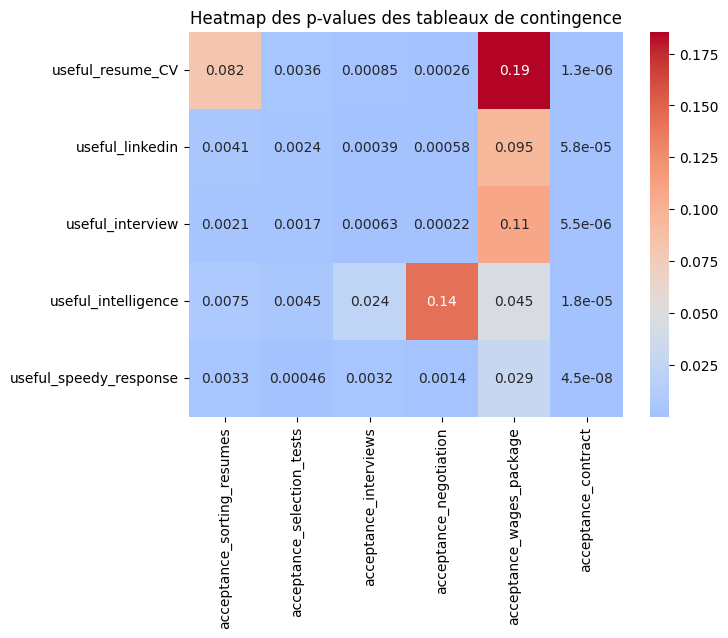

In [180]:
create_heatmap(df, usefulness_columns, acceptance_columns)

## Evaluation de la relation entre utilité perçue et la facilité d'usage

In [96]:
df['score_usefulness'] = df[usefulness_columns].sum(axis=1)
df['score_easiness'] = df[easiness_columns].sum(axis=1)

In [97]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_usefulness'], df['score_easiness'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 3586.0, p-valeur : 0.0001


## Test avec le Chi Square

In [98]:
# Calcul des p-values
p_values, associated_variables = calculus_chi_square(df, usefulness_columns, easiness_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('useful_resume_CV', 'easiness_generative_AI'): p-value = 0.0
Tableau de contingence ('useful_resume_CV', 'easiness_search_engine'): p-value = 0.76
Tableau de contingence ('useful_resume_CV', 'easiness_navigation'): p-value = 0.35
Tableau de contingence ('useful_resume_CV', 'easiness_business_sciences'): p-value = 0.21
Tableau de contingence ('useful_linkedin', 'easiness_generative_AI'): p-value = 0.0
Tableau de contingence ('useful_linkedin', 'easiness_search_engine'): p-value = 0.04
Tableau de contingence ('useful_linkedin', 'easiness_navigation'): p-value = 0.2
Tableau de contingence ('useful_linkedin', 'easiness_business_sciences'): p-value = 0.04
Tableau de contingence ('useful_interview', 'easiness_generative_AI'): p-value = 0.0
Tableau de contingence ('useful_interview', 'easiness_search_engine'): p-value = 0.44
Tableau de contingence ('useful_interview', 'easiness_navigation'): p-value = 0.64
Tableau de contingence ('useful_interview', 'easiness_business_

In [99]:
# P-values median
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.14


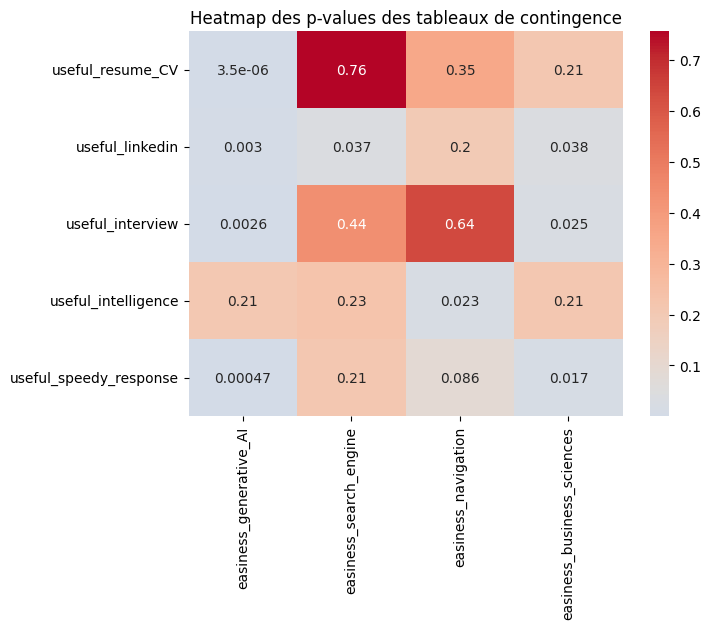

In [181]:
create_heatmap(df, usefulness_columns, easiness_columns)

## Evaluation de la relation entre utilité perçue et confiance

In [101]:
df['score_usefulness'] = df[usefulness_columns].sum(axis=1)
df['score_trust'] = df[trust_columns].sum(axis=1)

In [102]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_usefulness'], df['score_trust'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 137.0, p-valeur : 0.0


### Test avec le chi square

In [103]:
# Calcul des p-values
p_values, associated_variables = calculus_chi_square(df, usefulness_columns, trust_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('useful_resume_CV', 'trust_best_applicants'): p-value = 0.0
Tableau de contingence ('useful_resume_CV', 'trust_discrimination'): p-value = 0.0
Tableau de contingence ('useful_resume_CV', 'trust_ethics'): p-value = 0.0
Tableau de contingence ('useful_resume_CV', 'trust_diversity'): p-value = 0.0
Tableau de contingence ('useful_linkedin', 'trust_best_applicants'): p-value = 0.0
Tableau de contingence ('useful_linkedin', 'trust_discrimination'): p-value = 0.09
Tableau de contingence ('useful_linkedin', 'trust_ethics'): p-value = 0.02
Tableau de contingence ('useful_linkedin', 'trust_diversity'): p-value = 0.0
Tableau de contingence ('useful_interview', 'trust_best_applicants'): p-value = 0.0
Tableau de contingence ('useful_interview', 'trust_discrimination'): p-value = 0.03
Tableau de contingence ('useful_interview', 'trust_ethics'): p-value = 0.02
Tableau de contingence ('useful_interview', 'trust_diversity'): p-value = 0.03
Tableau de contingence ('useful_intelli

In [104]:
# P-values median
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.0


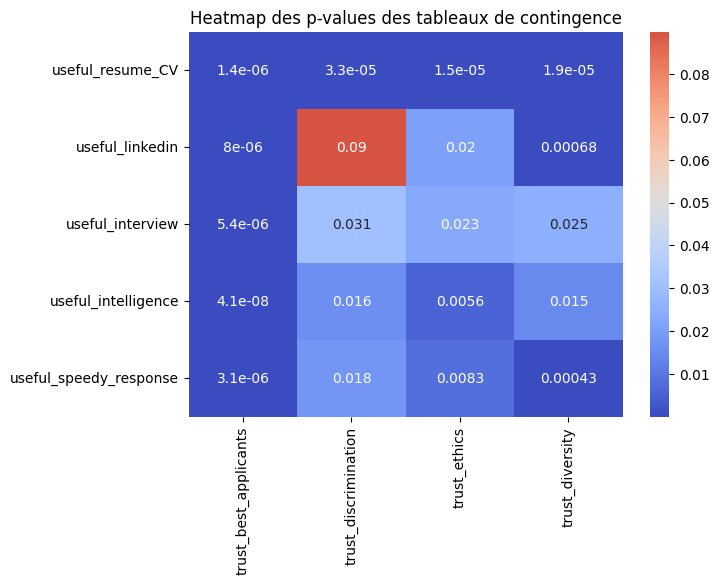

In [182]:
create_heatmap(df, usefulness_columns, trust_columns)

## Evaluation de la relation entre facilité d'usage et acceptation

In [106]:
df['score_easiness'] = df[easiness_columns].sum(axis=1)
df['score_acceptance'] = df[acceptance_columns].sum(axis=1)

In [107]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_easiness'], df['score_acceptance'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 2854.0, p-valeur : 0.0


### Test du Chi Square

In [109]:
# Calcul des p-values
p_values, associated_variables = calculus_chi_square(df, easiness_columns, acceptance_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('easiness_generative_AI', 'acceptance_sorting_resumes'): p-value = 0.04
Tableau de contingence ('easiness_generative_AI', 'acceptance_selection_tests'): p-value = 0.71
Tableau de contingence ('easiness_generative_AI', 'acceptance_interviews'): p-value = 0.44
Tableau de contingence ('easiness_generative_AI', 'acceptance_negotiation'): p-value = 0.13
Tableau de contingence ('easiness_generative_AI', 'acceptance_wages_package'): p-value = 0.59
Tableau de contingence ('easiness_generative_AI', 'acceptance_contract'): p-value = 0.17
Tableau de contingence ('easiness_search_engine', 'acceptance_sorting_resumes'): p-value = 0.25
Tableau de contingence ('easiness_search_engine', 'acceptance_selection_tests'): p-value = 0.79
Tableau de contingence ('easiness_search_engine', 'acceptance_interviews'): p-value = 0.64
Tableau de contingence ('easiness_search_engine', 'acceptance_negotiation'): p-value = 0.37
Tableau de contingence ('easiness_search_engine', 'acceptance_wages

In [110]:
# P-values median
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.43


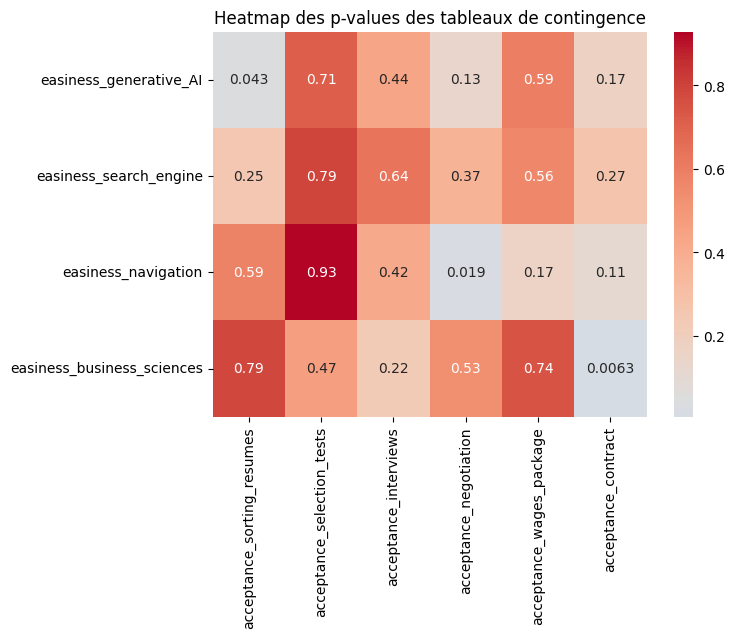

In [183]:
create_heatmap(df, easiness_columns, acceptance_columns)

## Evaluation de la relation entre facilité d'usage et confiance

In [112]:
df['score_easiness'] = df[easiness_columns].sum(axis=1)
df['score_trust'] = df[trust_columns].sum(axis=1)

In [113]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_easiness'], df['score_trust'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 148.0, p-valeur : 0.0


### Test du Chi Square

In [114]:
# Calcul des p-values
p_values, associated_variables = calculus_chi_square(df, easiness_columns, trust_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('easiness_generative_AI', 'trust_best_applicants'): p-value = 0.12
Tableau de contingence ('easiness_generative_AI', 'trust_discrimination'): p-value = 0.84
Tableau de contingence ('easiness_generative_AI', 'trust_ethics'): p-value = 0.77
Tableau de contingence ('easiness_generative_AI', 'trust_diversity'): p-value = 0.21
Tableau de contingence ('easiness_search_engine', 'trust_best_applicants'): p-value = 0.67
Tableau de contingence ('easiness_search_engine', 'trust_discrimination'): p-value = 0.48
Tableau de contingence ('easiness_search_engine', 'trust_ethics'): p-value = 0.54
Tableau de contingence ('easiness_search_engine', 'trust_diversity'): p-value = 0.81
Tableau de contingence ('easiness_navigation', 'trust_best_applicants'): p-value = 0.88
Tableau de contingence ('easiness_navigation', 'trust_discrimination'): p-value = 0.26
Tableau de contingence ('easiness_navigation', 'trust_ethics'): p-value = 0.73
Tableau de contingence ('easiness_navigation', 'tr

In [115]:
# P-values median
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.42


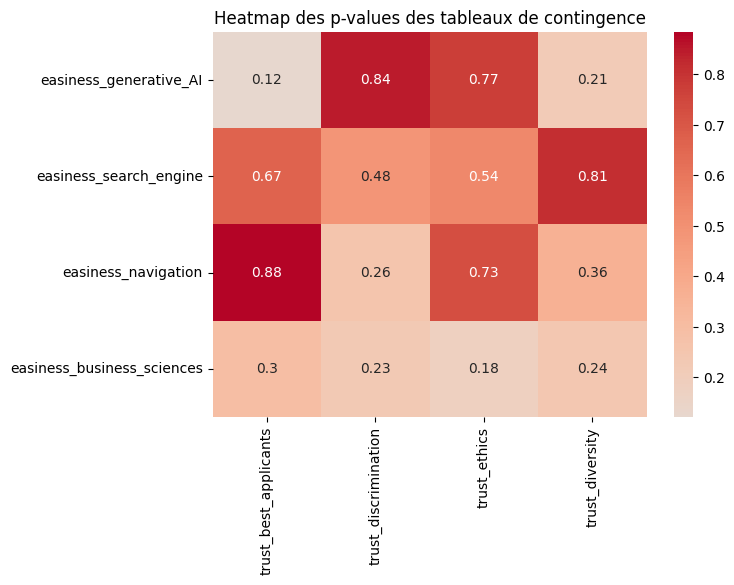

In [184]:
create_heatmap(df, easiness_columns, trust_columns)

## Evaluation de la relation entre confiance et acceptation

In [118]:
df['score_trust'] = df[trust_columns].sum(axis=1)
df['score_acceptance'] = df[acceptance_columns].sum(axis=1)

In [119]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_trust'], df['score_acceptance'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 705.0, p-valeur : 0.0


### Test du Chi Square

In [120]:
# Calcul des p-values
p_values, associated_variables = calculus_chi_square(df, trust_columns, acceptance_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('trust_best_applicants', 'acceptance_sorting_resumes'): p-value = 0.0
Tableau de contingence ('trust_best_applicants', 'acceptance_selection_tests'): p-value = 0.0
Tableau de contingence ('trust_best_applicants', 'acceptance_interviews'): p-value = 0.0
Tableau de contingence ('trust_best_applicants', 'acceptance_negotiation'): p-value = 0.0
Tableau de contingence ('trust_best_applicants', 'acceptance_wages_package'): p-value = 0.0
Tableau de contingence ('trust_best_applicants', 'acceptance_contract'): p-value = 0.0
Tableau de contingence ('trust_discrimination', 'acceptance_sorting_resumes'): p-value = 0.01
Tableau de contingence ('trust_discrimination', 'acceptance_selection_tests'): p-value = 0.0
Tableau de contingence ('trust_discrimination', 'acceptance_interviews'): p-value = 0.0
Tableau de contingence ('trust_discrimination', 'acceptance_negotiation'): p-value = 0.0
Tableau de contingence ('trust_discrimination', 'acceptance_wages_package'): p-value = 0.0

In [121]:
# P-values median
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.0


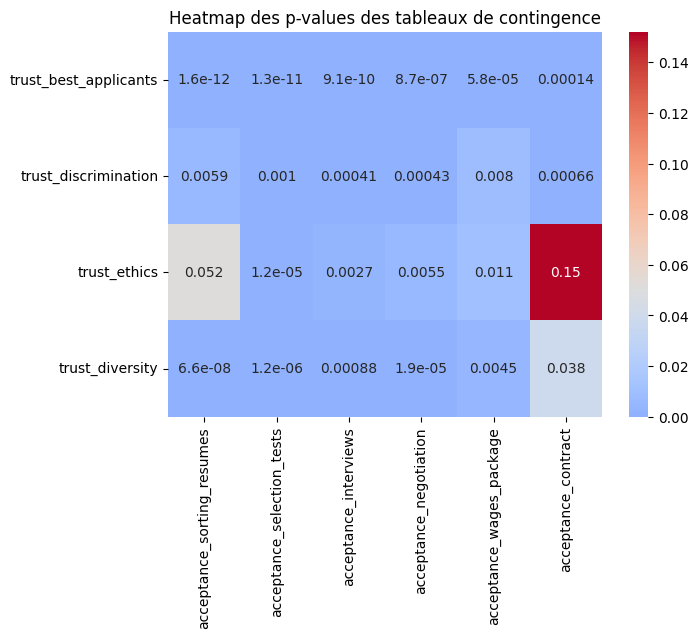

In [185]:
create_heatmap(df, trust_columns, acceptance_columns)

## Relation entre l'acceptation et l'âge 

# Visualisation des résultats catégoriels

## Visualisation des résultats pour l'utilité perçue

In [126]:
import matplotlib.pyplot as plt

### Préparation des données

In [133]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_usefulness_columns = {value: key for key, value in dict_usefulness_columns.items()}
reverse_likert_mapping_usefulness = {value: key for key, value in likert_mapping_usefulness.items()}
print(reverse_likert_mapping_usefulness)

{1: 'Totalement opposé', 2: 'Plutôt opposé', 3: 'Ni favorable, ni opposé', 4: 'Assez favorable', 5: 'Tout à fait favorable'}


In [135]:
# List of ordered categories 
ordered_cats_usefulness = list(reverse_likert_mapping_usefulness.values())

# Check out the outcome
print(ordered_cats_usefulness)

['Totalement opposé', 'Plutôt opposé', 'Ni favorable, ni opposé', 'Assez favorable', 'Tout à fait favorable']


In [136]:
colors = [plot_likert.colors.TRANSPARENT, "red", "orange", "lightgrey", "lightgreen", "green"]

/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


<Axes: xlabel='Percentage of Responses'>

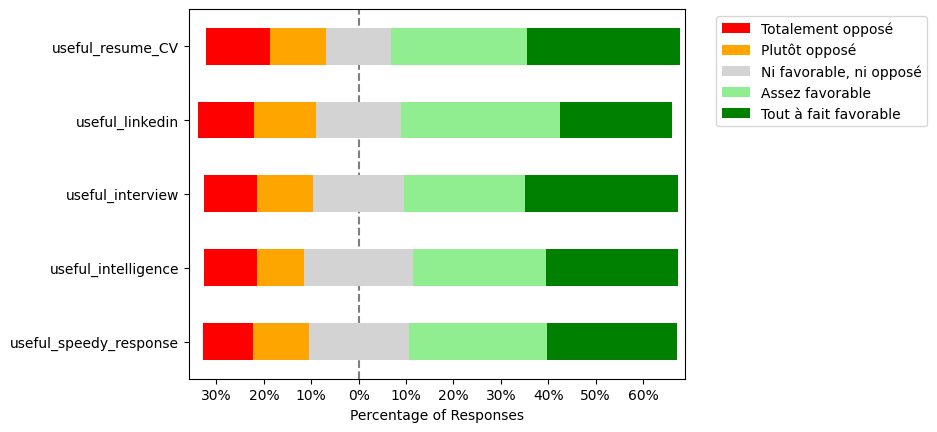

In [137]:
plot_likert.plot_likert(df_usefulness, ordered_cats_usefulness, plot_percentage=True, colors=colors)

### Visualisation de l'utilité perçue

## Visualisation des résultats pour la facilité d'usage

### Préparation des données

In [822]:
# List of ordered categories 
ordered_cats_easiness = list(reverse_likert_mapping_easiness.values())

# Check out the outcome
print(ordered_cats_easiness)

['easiness_generative_AI', 'easiness_search_engine', 'easiness_navigation', 'easiness_business_sciences']
["à l'aise", "Plutôt à l'aise", 'Ni aisance, ni difficultés', 'Quelques difficultés', 'En difficulté']


### Visualisation de la facilité d'usage perçue

In [1100]:
colors = [plot_likert.colors.TRANSPARENT, "green", "lightgreen", "lightgrey", "orange", "red"]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


<Axes: xlabel='Percentage of Responses'>

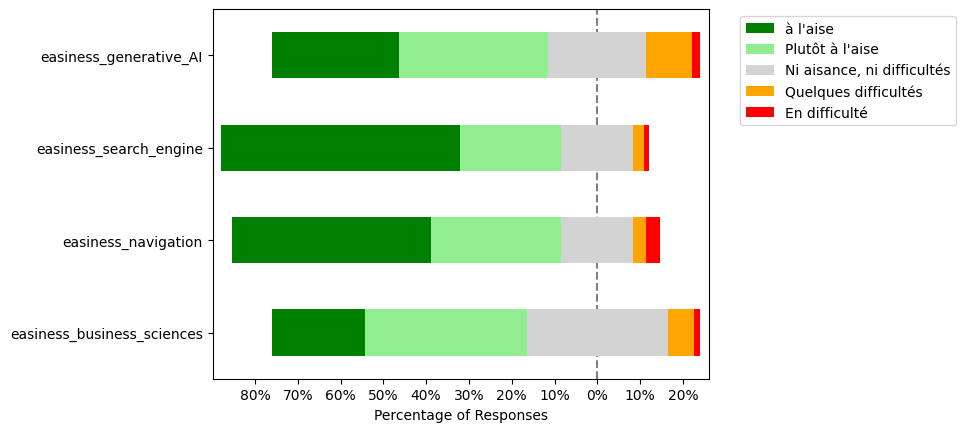

In [1101]:
plot_likert.plot_likert(df_easiness, ordered_cats_easiness, plot_percentage=True, colors=colors)

## Visualisation des résultats pour la crédibilité du recruteur utilisant l'IA

### Préparation des données

In [138]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_trust_columns = {value: key for key, value in dict_trust_columns.items()}
reverse_likert_mapping_trust = {value: key for key, value in likert_mapping_trust.items()}
print(reverse_likert_mapping_trust)

{1: 'Très faible', 2: 'Faible', 3: 'Ni faible, ni élevé', 4: 'Elevé', 5: 'Très élevé'}


In [139]:
# List of ordered categories 
ordered_cats_trust = list(reverse_likert_mapping_trust.values())

# Check out the outcome
print(ordered_cats_trust)

['Très faible', 'Faible', 'Ni faible, ni élevé', 'Elevé', 'Très élevé']


In [140]:
colors = [plot_likert.colors.TRANSPARENT, "red", "orange", "lightgrey", "lightgreen", "green"]

### Visualisation du niveau de crédibilité

/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


<Axes: xlabel='Percentage of Responses'>

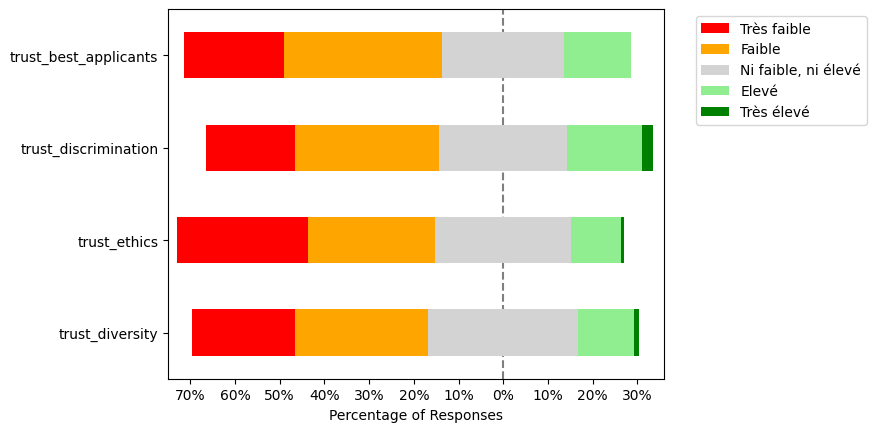

In [141]:
plot_likert.plot_likert(df_trust, ordered_cats_trust, plot_percentage=True, colors=colors)

## Visualisation de l'acceptation de l'IA par le candidat lors d'un recrutement

### Préparation des données

In [142]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_acceptance_columns = {value: key for key, value in dict_acceptance_columns.items()}
reverse_likert_mapping_acceptance = {value: key for key, value in likert_mapping_acceptance.items()}
print(reverse_likert_mapping_acceptance)

{1: 'Très réticent', 2: 'Réticent', 3: 'Ni réticent, ni favorable', 4: 'Favorable', 5: 'Très favorable'}


In [143]:
# List of ordered categories 
ordered_cats_acceptance = list(reverse_likert_mapping_acceptance.values())

# Check out the outcome
print(ordered_cats_acceptance)

['Très réticent', 'Réticent', 'Ni réticent, ni favorable', 'Favorable', 'Très favorable']


### Visualisation du niveau d'acceptation

In [144]:
colors = [plot_likert.colors.TRANSPARENT, "red", "orange", "lightgrey", "lightgreen", "green"]

/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


<Axes: xlabel='Percentage of Responses'>

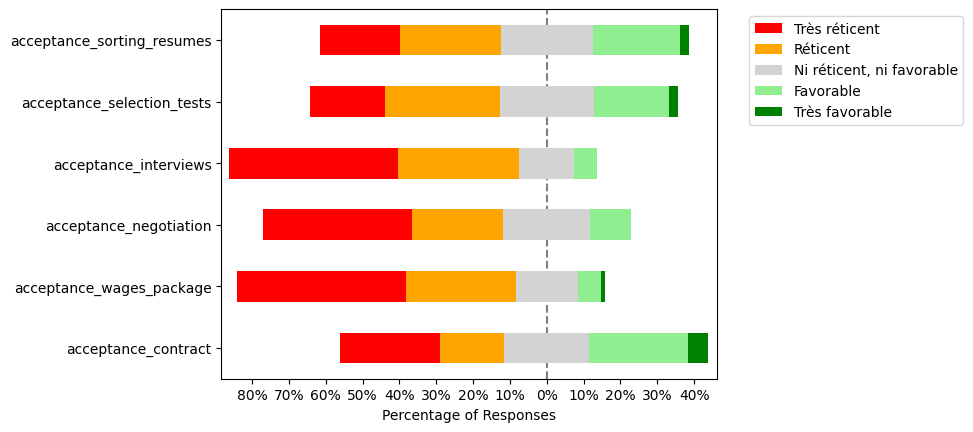

In [145]:
plot_likert.plot_likert(df_acceptance, ordered_cats_acceptance, plot_percentage=True, colors=colors)

## Visualisation de l'importance qu'un candidat apporte à l'éthique

### Préparation des données

In [146]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_ethics_columns = {value: key for key, value in dict_ethics_columns.items()}
reverse_likert_mapping_ethics = {value: key for key, value in likert_mapping_ethics.items()}
print(reverse_likert_mapping_ethics)

{5: "C'est très important", 4: "C'est plutôt important", 3: "C'est important ou secondaire", 2: "C'est plutôt secondaire", 1: "C'est très secondaire"}


In [147]:
# List of ordered categories 
ordered_cats_ethics = list(reverse_likert_mapping_ethics.values())

# Check out the outcome
print(ordered_cats_ethics)

["C'est très important", "C'est plutôt important", "C'est important ou secondaire", "C'est plutôt secondaire", "C'est très secondaire"]


In [148]:
colors = [plot_likert.colors.TRANSPARENT, "red", "orange", "lightgrey", "lightgreen", "green"]

### Visualisation de l'importance accordée à l'éthique

/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
/Users/fabricejaouen/apprendre-dev/survey/venv/lib/python3.10/site-packages/plot_likert/plot_likert.py:313: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another ques

<Axes: xlabel='Percentage of Responses'>

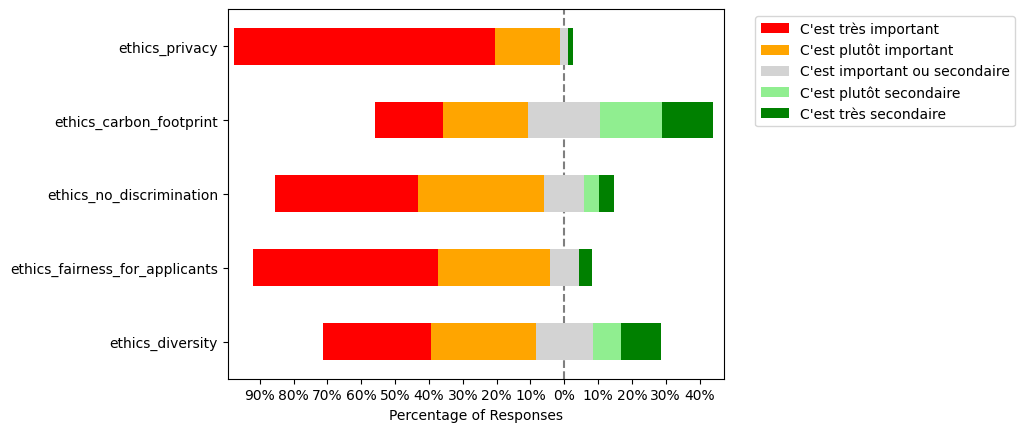

In [149]:
plot_likert.plot_likert(df_ethics, ordered_cats_ethics, plot_percentage=True, colors=colors)

## Contrôle de l'impact de l'âge sur les résultats

### H0 : L'âge n'a pas d'impact significatif sur l'utilité perçue

In [154]:
# Calcul des p-values
p_values, associated_variables = calculus_chi_square(df, ["misc_age_category"], usefulness_columns)

In [155]:
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('misc_age_category', 'useful_resume_CV'): p-value = 0.22
Tableau de contingence ('misc_age_category', 'useful_linkedin'): p-value = 0.27
Tableau de contingence ('misc_age_category', 'useful_interview'): p-value = 0.94
Tableau de contingence ('misc_age_category', 'useful_intelligence'): p-value = 0.26
Tableau de contingence ('misc_age_category', 'useful_speedy_response'): p-value = 0.22


In [157]:
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.26


### H0 : L'âge n'a pas d'impact significatif sur la facilité d'usage

In [158]:
p_values, associated_variables = calculus_chi_square(df, ["misc_age_category"], easiness_columns)

In [159]:
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('misc_age_category', 'easiness_generative_AI'): p-value = 0.01
Tableau de contingence ('misc_age_category', 'easiness_search_engine'): p-value = 0.47
Tableau de contingence ('misc_age_category', 'easiness_navigation'): p-value = 0.72
Tableau de contingence ('misc_age_category', 'easiness_business_sciences'): p-value = 0.47


In [160]:
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.47


### H0 : L'âge n'a pas d'impact significatif sur la confiance

In [1187]:
p_values, associated_variables = calculus_chi_square(df, ["misc_age_category"], trust_columns)

In [161]:
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('misc_age_category', 'easiness_generative_AI'): p-value = 0.01
Tableau de contingence ('misc_age_category', 'easiness_search_engine'): p-value = 0.47
Tableau de contingence ('misc_age_category', 'easiness_navigation'): p-value = 0.72
Tableau de contingence ('misc_age_category', 'easiness_business_sciences'): p-value = 0.47


In [163]:
_values_median = median(p_values)
print(round(p_values_median, 2))

0.47


### H0 : L'âge n'a pas d'impact significatif sur l'acceptation

In [164]:
p_values, associated_variables = calculus_chi_square(df, ["misc_age_category"], acceptance_columns)

In [165]:
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {associated_variables[i]}: p-value = {round(p, 2)}')

Tableau de contingence ('misc_age_category', 'acceptance_sorting_resumes'): p-value = 0.59
Tableau de contingence ('misc_age_category', 'acceptance_selection_tests'): p-value = 0.11
Tableau de contingence ('misc_age_category', 'acceptance_interviews'): p-value = 0.76
Tableau de contingence ('misc_age_category', 'acceptance_negotiation'): p-value = 0.45
Tableau de contingence ('misc_age_category', 'acceptance_wages_package'): p-value = 0.66
Tableau de contingence ('misc_age_category', 'acceptance_contract'): p-value = 0.58


In [166]:
p_values_median = median(p_values)
print(round(p_values_median, 2))

0.59
